# Mini-Project: SVM & LR Classification
### Ryan Bass, Brett Benefield, Cho Kim, Nicole Wittlin

<span style="color: blue">Remove all blue text before submitting</span>

In [1]:
%matplotlib inline
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from IPython.display import HTML, display
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
verboseStatus = False

In [3]:
# Brett's directory
# Desktop
#%cd "C:\Sandbox\SMU\dataMining\ChoRepo\EducationDataNC\2017\Machine Learning Datasets"
# Laptop
%cd "C:\sandbox\SMU\dataMining\choNotebook\EducationDataNC\2017\Machine Learning Datasets"

# Ryan's directory
#%cd "C:\Users\Clovis\Documents\7331DataMining\EducationDataNC\2017\Machine Learning Datasets"

# Cho's directory. Either uncomment the cd statement above or make your own cd.
#%cd "/Users/chostone/Documents/Data Mining/7331DataMining/EducationDataNC/2017/Machine Learning Datasets"

# NW directorY 
#%cd "C:\Users\Nicole Wittlin\Documents\7331DataMining\EducationDataNC\2017\Raw Datasets"
dfPublicHS = pd.read_csv("PublicHighSchools2017_ML.csv")

print('********* Initial Values Before Cleaning *******************')
dfPublicHS.info(verbose = verboseStatus)

C:\sandbox\SMU\dataMining\choNotebook\EducationDataNC\2017\Machine Learning Datasets
********* Initial Values Before Cleaning *******************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Columns: 403 entries, student_num to unit_code
dtypes: float64(322), int64(81)
memory usage: 1.4 MB


In [4]:
# store all column names to a list
colNames = dfPublicHS.columns.tolist()

# Create correlation matrix
dfCorr = dfPublicHS[colNames].corr('pearson').abs()

# print correlation matrix
dfCorr

,student_num,lea_avg_student_num,st_avg_student_num,09_Size,10_Size,11_Size,12_Size,Biology_Size,English II_Size,Math I_Size,...,SRC_Grades_Devices_Sent_Home_6:07:08,SRC_Grades_Devices_Sent_Home_6:7:8:9:10:11:12,SRC_Grades_Devices_Sent_Home_6:7:8:9:10:11:12:13,SRC_Grades_Devices_Sent_Home_8:9:10:11:12:13,SRC_Grades_Devices_Sent_Home_9:10,SRC_Grades_Devices_Sent_Home_9:10:11,SRC_Grades_Devices_Sent_Home_9:10:11:12,SRC_Grades_Devices_Sent_Home_9:10:11:12:13,SRC_Grades_Devices_Sent_Home_9:10:12,unit_code
student_num,1.000000,0.577813,0.158654,0.482427,0.545790,0.622973,0.602696,0.651012,0.542595,0.504443,...,0.006434,0.068748,0.050118,0.053001,0.038277,0.020877,0.044087,0.307002,0.040069,0.095413
lea_avg_student_num,0.577813,1.000000,0.266009,0.227217,0.256996,0.256629,0.241507,0.415685,0.292036,0.272326,...,0.059568,0.109862,0.081064,0.083629,0.018843,0.060824,0.172195,0.116165,0.064520,0.169113
st_avg_student_num,0.158654,0.266009,1.000000,0.133943,0.113514,0.185630,0.213359,0.229118,0.171302,0.115240,...,0.083580,0.373113,0.263549,0.009292,0.009292,0.026481,0.006265,0.058825,0.009292,0.063130
09_Size,0.482427,0.227217,0.133943,1.000000,0.712800,0.592155,0.554159,0.540738,0.477195,0.587350,...,0.001953,0.075839,0.009608,0.100266,0.031583,0.066520,0.023474,0.251240,0.015102,0.050861
10_Size,0.545790,0.256996,0.113514,0.712800,1.000000,0.633552,0.594540,0.594721,0.546398,0.479184,...,0.042601,0.081432,0.017624,0.017624,0.087442,0.019057,0.062975,0.294168,0.002324,0.033635
11_Size,0.622973,0.256629,0.185630,0.592155,0.633552,1.000000,0.790071,0.601437,0.514401,0.508646,...,0.041734,0.075168,0.089832,0.089832,0.016359,0.059943,0.078185,0.330737,0.000614,0.000788
12_Size,0.602696,0.241507,0.213359,0.554159,0.594540,0.790071,1.000000,0.548973,0.480256,0.486297,...,0.046796,0.071525,0.077970,0.077970,0.001879,0.046245,0.081762,0.402232,0.001879,0.050470
Biology_Size,0.651012,0.415685,0.229118,0.540738,0.594721,0.601437,0.548973,1.000000,0.728654,0.599181,...,0.025074,0.094739,0.050517,0.050517,0.025913,0.086837,0.022969,0.140187,0.017711,0.048523
English II_Size,0.542595,0.292036,0.171302,0.477195,0.546398,0.514401,0.480256,0.728654,1.000000,0.617556,...,0.041859,0.111418,0.066417,0.009095,0.009095,0.064511,0.038768,0.130433,0.033662,0.050935
Math I_Size,0.504443,0.272326,0.115240,0.587350,0.479184,0.508646,0.486297,0.599181,0.617556,1.000000,...,0.041099,0.088183,0.033329,0.016558,0.000071,0.015011,0.016565,0.146079,0.016700,0.005566


In [5]:
## source for code below: https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/ ##

# Select upper triangle of correlation matrix
upper = dfCorr.where(np.triu(np.ones(dfCorr.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.94
to_drop = [column for column in upper.columns if any(upper[column] > 0.94)]
to_drop
print (len(to_drop))

11


In [6]:
# code to determine the number of highly correlated variables to drop for given r.
r = .95
while (r >= .80):
    to_drop = [column for column in upper.columns if any(upper[column] > r)]
    print('For r of ', r, 'drop # is:', len(to_drop) )
    r = r-.01
    r = round(r,2)
# print the list of columns to drop for the last iteration of the while loop.    
to_drop

## I can't get this to work!! Uncomment it to see the error##
#dfDropped = dfPublicHS.drop(dfPublicHS.columns[to_drop], axis=1)

For r of  0.95 drop # is: 0
For r of  0.94 drop # is: 11
For r of  0.93 drop # is: 22
For r of  0.92 drop # is: 28
For r of  0.91 drop # is: 34
For r of  0.9 drop # is: 42
For r of  0.89 drop # is: 51
For r of  0.88 drop # is: 58
For r of  0.87 drop # is: 66
For r of  0.86 drop # is: 72
For r of  0.85 drop # is: 80
For r of  0.84 drop # is: 88
For r of  0.83 drop # is: 99
For r of  0.82 drop # is: 107
For r of  0.81 drop # is: 116
For r of  0.8 drop # is: 124


['lea_state_perpupil_num',
 '4-Year Cohort Graduation Rate Score',
 'ACTMath_ACTBenchmark_All',
 'ACTScience_ACTBenchmark_All',
 'ACTWorkKeys_SilverPlus_All',
 'ACTWriting_ACTBenchmark_All',
 'EOCSubjects_CACR_All',
 'ACTCompositeScore_UNCMin_Female',
 'ACTEnglish_ACTBenchmark_Female',
 'ACTMath_ACTBenchmark_Female',
 'ACTReading_ACTBenchmark_Female',
 'ACTScience_ACTBenchmark_Female',
 'ACTWorkKeys_SilverPlus_Female',
 'EOCBiology_CACR_Female',
 'EOCEnglish2_CACR_Female',
 'GraduationRate_5yr_Female',
 'ACTCompositeScore_UNCMin_Male',
 'ACTMath_ACTBenchmark_Male',
 'ACTScience_ACTBenchmark_Male',
 'ACTWorkKeys_SilverPlus_Male',
 'ACTWriting_ACTBenchmark_Male',
 'EOCBiology_CACR_Male',
 'EOCEnglish2_CACR_Male',
 'EOCMathI_CACR_Male',
 'ACTMath_ACTBenchmark_AmericanIndian',
 'ACTWorkKeys_SilverPlus_AmericanIndian',
 'ACTWriting_ACTBenchmark_AmericanIndian',
 'EOCBiology_CACR_AmericanIndian',
 'EOCEnglish2_CACR_AmericanIndian',
 'EOCMathI_CACR_AmericanIndian',
 'GraduationRate_4yr_Americ

## Create Models (50 points)
<span style="color: blue">Create a logistic regression model and a support vector machine model for the classification task involved with your dataset. Assess how well each model performs (use 80/20 training/testing split for your data). <b>Adjust parameters of the models to make them more accurate.</b> If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use. That is, the SGDClassifier is fine to use for optimizing logistic regression and linear support vector machines. For many problems, SGD will be required in order to train the SVM model in a reasonable timeframe.

## Support Vector Machines

In [7]:
# Source: https://medium.com/@aneesha/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d
def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha="right")
    plt.show()

In [8]:
cls = SVC(kernel='linear')

In [9]:
splitLimit = 52
dfPublicHS['schoolPctTarget'] = np.where(dfPublicHS['ALL_All Students (Total or Subtotal_ENROLL_sch_pct'] >= splitLimit, 1, 0)
dfPublicHS['schoolPctTarget'].sum()

239

### Column preparation

In [10]:
# Credit: https://stackoverflow.com/questions/19758364/rename-a-single-column-header-in-a-pandas-dataframe
# X = dfPublicHS.iloc[:, 1:100]
dropCols = dfPublicHS.filter(regex = r'sch_pct|college')
renameCols = {'_1yr_tchr_trnovr_pct': 'One_yr_tchr_trnovr_pct',
              '0-3 Years_LEA_Exp_Pct_Prin': 'Less_3_Years_LEA_Exp_Pct_Prin',
              '10+ Years_LEA_Exp_Pct_Prin': 'Ten_Plus_Years_LEA_Exp_Pct_Prin',
              '4-10 Years_LEA_Exp_Pct_Prin': 'Four_Plus_Years_LEA_Exp_Pct_Prin'}
dfPublicHS.drop(dropCols, axis = 1, inplace = True)
dfPublicHS.rename(columns=renameCols, inplace = True)
X = dfPublicHS.iloc[:, 150:300]
y = dfPublicHS.schoolPctTarget

In [11]:
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2)

In [ ]:
%time cls.fit(xTrain, yTrain)

In [37]:
yhat = cls.predict(xTest)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.feature_extraction.text import CountVectorizer
print(confusion_matrix(yTest, yhat))
print(classification_report(yTest, yhat))

[[31 14]
 [19 30]]
             precision    recall  f1-score   support

          0       0.62      0.69      0.65        45
          1       0.68      0.61      0.65        49

avg / total       0.65      0.65      0.65        94



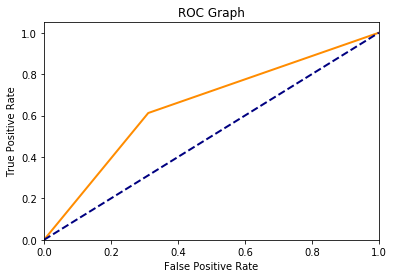

In [39]:
fpr, tpr, thresholds = roc_curve(yTest, yhat)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.show()

150
157


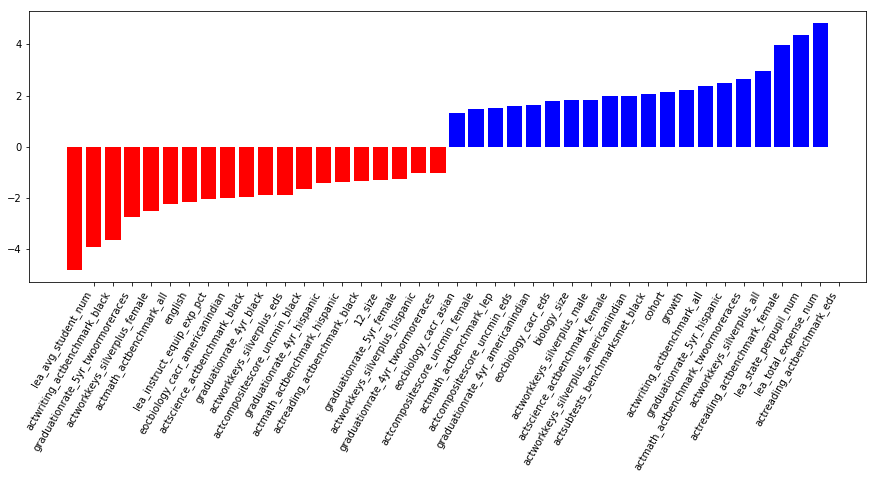

In [42]:
# Source: https://medium.com/@aneesha/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d
cv = CountVectorizer(stop_words='english', analyzer='word', ngram_range=(1,1), max_df=1.0, min_df=1)
cv.fit(xTrain)

plot_coefficients(cls, cv.get_feature_names())

In [ ]:
# Source: https://stackoverflow.com/questions/34649969/how-to-find-the-features-names-of-the-coefficients-using-scikit-linear-regressio
coef_dict = {}
for coef, feat in zip(cls.coef_[0,:], X.columns):
    coef_dict[feat] = coef

for key, value in coef_dict.items():
    #print(key, value)

In [56]:
# Cool Plot
# http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#example-svm-plot-separating-hyperplane-py

88

## Model Advantages (10 points)
<span style="color: blue">Discuss the advantages of each model for each classification task. Does one type of model offer superior performance over another in terms of prediction accuracy? In terms of training time or efficiency? Explain in detail.</span>

## Interpret Feature Importance (30 points)

<span style="color: blue">Use the weights from logistic regression to interpret the importance of different features for the classification task. <b>Explain your interpretation in detail.</b>Why do you think some variables are more important?

## Interpret Support Vectors (10 points)
<span style="color:blue">Look at the chosen support vectors for the classification task. Do these provide any insight into the data? Explain. If you used stochastic gradient descent (and therefore did not explicitly solve for support vectors), try subsampling your data to train the SVC model— then analyze the support vectors from the subsampled dataset.